<a href="https://colab.research.google.com/github/Joy-Dorcas/Drug-Drug-Interaction-Prediction/blob/main/Drug_interaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyTDC

In [14]:
from google.colab import files
uploaded = files.upload()


Saving comprehensive_ddi_dataset.csv to comprehensive_ddi_dataset.csv
Saving drugbank_id_to_name.csv to drugbank_id_to_name.csv
Saving drug_smiles_mapping.csv to drug_smiles_mapping.csv
Saving twosides_side_effect_labels.json to twosides_side_effect_labels.json


In [21]:
!pip uninstall -y numpy pandas


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2


In [22]:
!pip install numpy==2.1.3 pandas==2.2.3 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 76.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytdc 1.0.0 requires numpy<2.0.0,>=1.26.4, but you have numpy 2.1.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.9.0 which is incompatible.
imbalanced-learn 0.14.0 requires scikit-learn<2,>=1.4.2, but you have scikit-learn 1.2.2 which is incompatible.


In [15]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:
!ls /content
!ls /content/drive/MyDrive


comprehensive_ddi_dataset.csv  drug_smiles_mapping.csv
drive			       sample_data
drugbank_id_to_name.csv        twosides_side_effect_labels.json
 Classroom
'Colab Notebooks'
'Copy of Week 1 - Welcome Video - Professional Foundations.gdoc'
'Getting started.pdf'
"I am sharing '5400' with you"
 IMG_4281.JPG
 IMG_4282.JPG
 IMG_4283.JPG
 IMG_4341.JPG
 IMG_4342.JPG
 IMG_4344.JPG
 IMG_4345.JPG
 IMG_4392.JPG
 IMG_4393.JPG
 IMG_4476.JPG
 IMG_4477.JPG
 IMG_4478.JPG
 IMG_4479.JPG
 IMG_4481.JPG
'Saved from the Google app'


In [25]:
!mv /content/comprehensive_ddi_dataset.csv /content/drive/MyDrive/
!mv /content/drug_smiles_mapping.csv /content/drive/MyDrive/
!mv /content/drugbank_id_to_name.csv /content/drive/MyDrive/
!mv /content/twosides_side_effect_labels.json /content/drive/MyDrive/


In [26]:
!ls /content/drive/MyDrive


 Classroom
'Colab Notebooks'
 comprehensive_ddi_dataset.csv
'Copy of Week 1 - Welcome Video - Professional Foundations.gdoc'
 drugbank_id_to_name.csv
 drug_smiles_mapping.csv
'Getting started.pdf'
"I am sharing '5400' with you"
 IMG_4281.JPG
 IMG_4282.JPG
 IMG_4283.JPG
 IMG_4341.JPG
 IMG_4342.JPG
 IMG_4344.JPG
 IMG_4345.JPG
 IMG_4392.JPG
 IMG_4393.JPG
 IMG_4476.JPG
 IMG_4477.JPG
 IMG_4478.JPG
 IMG_4479.JPG
 IMG_4481.JPG
'Saved from the Google app'
 twosides_side_effect_labels.json


In [30]:
!pip install -U numpy==1.26.4 pandas==2.2.2


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
mlxtend 0.23.4 requires scikit-learn

In [1]:

import pandas as pd

ddi = pd.read_csv('/content/drive/MyDrive/comprehensive_ddi_dataset.csv')
smiles = pd.read_csv('/content/drive/MyDrive/drug_smiles_mapping.csv')
drugbank = pd.read_csv('/content/drive/MyDrive/drugbank_id_to_name.csv')

import json
with open('/content/drive/MyDrive/twosides_side_effect_labels.json') as f:
    side_effects = json.load(f)



In [3]:
# Load the main dataset
comprehensive_ddi_dataset = pd.read_csv('/content/drive/MyDrive/comprehensive_ddi_dataset.csv')

# Load the mapping file
drugbank_id_to_name = pd.read_csv('/content/drive/MyDrive/drugbank_id_to_name.csv')

# Merge Drug1_ID and Drug2_ID with names
comprehensive_ddi_dataset = comprehensive_ddi_dataset.merge(
    drugbank_id_to_name.rename(columns={'drugbank_id':'Drug1_ID','name':'Drug1_Name'}),
    on='Drug1_ID', how='left'
)
comprehensive_ddi_dataset = comprehensive_ddi_dataset.merge(
    drugbank_id_to_name.rename(columns={'drugbank_id':'Drug2_ID','name':'Drug2_Name'}),
    on='Drug2_ID', how='left'
)

print(comprehensive_ddi_dataset.head())

       Drug1_ID                                              Drug1  \
0  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   
1  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   
2  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   
3  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   
4  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   

       Drug2_ID                                         Drug2    Y  \
0  CID000003345  CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3  767   
1  CID000003345  CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3   25   
2  CID000003345  CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3   85   
3  CID000003345  CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3  735   
4  CID000003345  CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3  959   

   Drug1_Name_x  Drug2_Name_x Drug1_Name_y Drug2_Name_y  
0           NaN           NaN          NaN          NaN  
1           NaN           NaN          NaN

In [4]:
comprehensive_ddi_dataset = comprehensive_ddi_dataset.merge(
    drugbank_id_to_name.rename(columns={'drugbank_id':'Drug1_ID','name':'Drug1_Name'}),
    on='Drug1_ID', how='left'
)
comprehensive_ddi_dataset = comprehensive_ddi_dataset.merge(
    drugbank_id_to_name.rename(columns={'drugbank_id':'Drug2_ID','name':'Drug2_Name'}),
    on='Drug2_ID', how='left'
)


In [6]:
import pandas as pd
import json

# Load the side effect labels JSON
with open('/content/drive/MyDrive/twosides_side_effect_labels.json', 'r') as f:
    twosides_df = pd.DataFrame([json.load(f)])

side_effect_mapping = {col: twosides_df[col][0] for col in twosides_df.columns}
comprehensive_ddi_dataset['SideEffect'] = comprehensive_ddi_dataset['Y'].map(side_effect_mapping)


In [7]:
print(comprehensive_ddi_dataset.columns)


Index(['Drug1_ID', 'Drug1', 'Drug2_ID', 'Drug2', 'Y', 'Drug1_Name_x',
       'Drug2_Name_x', 'Drug1_Name_y', 'Drug2_Name_y', 'Drug1_Name',
       'Drug2_Name', 'SideEffect'],
      dtype='object')


In [8]:
# Keep the correct drug name columns and drop duplicates
comprehensive_ddi_dataset.rename(
    columns={'Drug1_Name_y':'Drug1_Name', 'Drug2_Name_y':'Drug2_Name'}, inplace=True
)

# Optionally drop the extra columns
comprehensive_ddi_dataset.drop(columns=['Drug1_Name_x','Drug2_Name_x'], inplace=True)

# Check that it worked
print(comprehensive_ddi_dataset[['Drug1_ID', 'Drug1_Name', 'Drug2_ID', 'Drug2_Name', 'Y', 'SideEffect']].head(10))

# Check for missing values
print("Missing Drug1 names:", comprehensive_ddi_dataset['Drug1_Name'].isna().sum())
print("Missing Drug2 names:", comprehensive_ddi_dataset['Drug2_Name'].isna().sum())
print("Missing side effect mappings:", comprehensive_ddi_dataset['SideEffect'].isna().sum())


       Drug1_ID Drug1_Name Drug1_Name      Drug2_ID Drug2_Name Drug2_Name  \
0  CID000002173        NaN        NaN  CID000003345        NaN        NaN   
1  CID000002173        NaN        NaN  CID000003345        NaN        NaN   
2  CID000002173        NaN        NaN  CID000003345        NaN        NaN   
3  CID000002173        NaN        NaN  CID000003345        NaN        NaN   
4  CID000002173        NaN        NaN  CID000003345        NaN        NaN   
5  CID000002173        NaN        NaN  CID000003345        NaN        NaN   
6  CID000002173        NaN        NaN  CID000003345        NaN        NaN   
7  CID000002173        NaN        NaN  CID000003345        NaN        NaN   
8  CID000002173        NaN        NaN  CID000003345        NaN        NaN   
9  CID000002173        NaN        NaN  CID000003345        NaN        NaN   

      Y SideEffect  
0   767        NaN  
1    25        NaN  
2    85        NaN  
3   735        NaN  
4   959        NaN  
5   255        NaN  
6   7

In [10]:
import pandas as pd

# Load the SMILES mapping CSV
drug_smiles_mapping = pd.read_csv('/content/drive/MyDrive/drug_smiles_mapping.csv')

# Check results
print(f"✓ DDI Dataset: {len(comprehensive_ddi_dataset):,} records")
print(f"✓ SMILES Mapping: {len(drug_smiles_mapping):,} drugs")

print("\nSample of drug_smiles_mapping:")
print(drug_smiles_mapping.head())


✓ DDI Dataset: 3,254,609 records
✓ SMILES Mapping: 645 drugs

Sample of drug_smiles_mapping:
    drugbank_id                                             smiles
0  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...
1  CID000005206                           C(OC(C(F)(F)F)C(F)(F)F)F
2  CID000003929      CC(=O)NCC1CN(C(=O)O1)C2=CC(=C(C=C2)N3CCOCC3)F
3  CID000001302                CC(C1=CC2=C(C=C1)C=C(C=C2)OC)C(=O)O
4  CID000005267  CC(=O)SC1CC2=CC(=O)CCC2(C3C1C4CCC5(C4(CC3)C)CC...


In [11]:
# STEP 2: Create CID to SMILES Dictionary
print("\n[STEP 2] Creating CID to SMILES mapping...")

# Create dictionary mapping CID to SMILES
cid_to_smiles = dict(zip(
    drug_smiles_mapping['drugbank_id'],  # Actually CIDs like CID000002173
    drug_smiles_mapping['smiles']
))

print(f"✓ Created mapping for {len(cid_to_smiles):,} CID-SMILES pairs")

# Show a few examples
print("\nSample CID → SMILES mappings:")
for i, (cid, smiles) in enumerate(list(cid_to_smiles.items())[:3]):
    print(f"{i+1}. {cid}")
    print(f"   SMILES: {smiles[:60]}...")
    print()

# Verify the CIDs in your DDI dataset exist in this mapping
sample_drug1_ids = comprehensive_ddi_dataset['Drug1_ID'].head(5).tolist()
sample_drug2_ids = comprehensive_ddi_dataset['Drug2_ID'].head(5).tolist()

print("Checking if sample CIDs from DDI dataset exist in SMILES mapping:")
print(f"\nSample Drug1 IDs: {sample_drug1_ids}")
print(f"Sample Drug2 IDs: {sample_drug2_ids}")

matches_drug1 = sum(1 for cid in sample_drug1_ids if cid in cid_to_smiles)
matches_drug2 = sum(1 for cid in sample_drug2_ids if cid in cid_to_smiles)

print(f"\n✓ Drug1 matches: {matches_drug1}/5")
print(f"✓ Drug2 matches: {matches_drug2}/5")

# Check overall coverage
all_cids_in_ddi = set(comprehensive_ddi_dataset['Drug1_ID'].unique()) | set(comprehensive_ddi_dataset['Drug2_ID'].unique())
cids_with_smiles = set(cid_to_smiles.keys())
coverage = len(all_cids_in_ddi & cids_with_smiles) / len(all_cids_in_ddi) * 100


print(f"  - Unique CIDs in DDI dataset: {len(all_cids_in_ddi):,}")
print(f"  - CIDs with SMILES available: {len(cids_with_smiles):,}")
print(f"  - Coverage: {coverage:.1f}%")

if coverage < 50:
    print("  WARNING: Low coverage! Only {:.1f}% of CIDs have SMILES.".format(coverage))
    print("   This means most drug names won't be mapped.")
else:
    print(f"\n✓ Good coverage! {coverage:.1f}% of CIDs have SMILES available.")


[STEP 2] Creating CID to SMILES mapping...
✓ Created mapping for 645 CID-SMILES pairs

Sample CID → SMILES mappings:
1. CID000002173
   SMILES: CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O)[O-])C...

2. CID000005206
   SMILES: C(OC(C(F)(F)F)C(F)(F)F)F...

3. CID000003929
   SMILES: CC(=O)NCC1CN(C(=O)O1)C2=CC(=C(C=C2)N3CCOCC3)F...

Checking if sample CIDs from DDI dataset exist in SMILES mapping:

Sample Drug1 IDs: ['CID000002173', 'CID000002173', 'CID000002173', 'CID000002173', 'CID000002173']
Sample Drug2 IDs: ['CID000003345', 'CID000003345', 'CID000003345', 'CID000003345', 'CID000003345']

✓ Drug1 matches: 5/5
✓ Drug2 matches: 5/5
  - Unique CIDs in DDI dataset: 645
  - CIDs with SMILES available: 645
  - Coverage: 100.0%

✓ Good coverage! 100.0% of CIDs have SMILES available.


In [12]:
# STEP 3: Function to Get Drug Name from SMILES using PubChem

import requests
import time

print("\n[STEP 3] Setting up PubChem lookup function...")

def get_drug_name_from_smiles(smiles, max_retries=3):
    """
    Fetch drug name from PubChem using SMILES string

    Args:
        smiles: SMILES string representation of the molecule
        max_retries: Number of retry attempts if request fails

    Returns:
        Drug name (string) or None if not found
    """
    for attempt in range(max_retries):
        try:
            # Clean SMILES (remove any whitespace)
            smiles_clean = smiles.strip()

            # PubChem API endpoint
            url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{smiles_clean}/property/Title/JSON"

            response = requests.get(url, timeout=10)

            if response.status_code == 200:
                data = response.json()
                name = data['PropertyTable']['Properties'][0]['Title']
                return name
            elif response.status_code == 404:
                # SMILES not found in PubChem
                return None
            else:
                # Other error, retry
                if attempt < max_retries - 1:
                    time.sleep(1)
                    continue
                return None

        except Exception as e:
            if attempt < max_retries - 1:
                time.sleep(1)
                continue
            return None

    return None

print("✓ Lookup function ready")

# Test the function with a sample SMILES
print("\nTesting function with sample SMILES...")
test_cid = 'CID000002173'
test_smiles = cid_to_smiles[test_cid]

print(f"\nTest CID: {test_cid}")
print(f"SMILES: {test_smiles[:60]}...")

print("\nFetching drug name from PubChem...")
test_name = get_drug_name_from_smiles(test_smiles)

if test_name:
    print(f"✓ SUCCESS! Drug name: {test_name}")
    print("\nThe function works correctly!")
else:
    print("✗ Could not retrieve drug name")
    print("This SMILES might not be in PubChem database")

print("Ready to fetch all drug names!")
print(f"We have {len(cid_to_smiles)} drugs to process")
print("Estimated time: ~3-5 minutes (with rate limiting)")


[STEP 3] Setting up PubChem lookup function...
✓ Lookup function ready

Testing function with sample SMILES...

Test CID: CID000002173
SMILES: CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O)[O-])C...

Fetching drug name from PubChem...
✓ SUCCESS! Drug name: 6-{[Amino(phenyl)acetyl]amino}-3,3-dimethyl-7-oxo-4-thia-1-azabicyclo[3.2.0]heptane-2-carboxylate

The function works correctly!
Ready to fetch all drug names!
We have 645 drugs to process
Estimated time: ~3-5 minutes (with rate limiting)


In [13]:

# STEP 4: Fetch Drug Names for All CIDs


from tqdm.notebook import tqdm
import json

print("\n[STEP 4] Fetching drug names from PubChem...")
print("⏱️  Estimated time: 3-5 minutes")
print("📊 Progress bar will show status\n")

# Get unique CIDs we need to map
unique_cids = list(cid_to_smiles.keys())
print(f"Total CIDs to process: {len(unique_cids):,}")

# Create mapping dictionary
cid_to_name = {}
failed_cids = []
success_count = 0
fail_count = 0

# Process with progress bar
for cid in tqdm(unique_cids, desc="Fetching drug names"):
    smiles = cid_to_smiles.get(cid)

    if smiles:
        name = get_drug_name_from_smiles(smiles)

        if name:
            cid_to_name[cid] = name
            success_count += 1
        else:
            failed_cids.append(cid)
            fail_count += 1

    # Rate limiting - be nice to PubChem servers
    time.sleep(0.3)

    # Save progress every 50 drugs (in case of interruption)
    if len(cid_to_name) % 50 == 0 and len(cid_to_name) > 0:
        with open('cid_to_name_progress.json', 'w') as f:
            json.dump(cid_to_name, f, indent=2)

print("FETCHING COMPLETE!")
print(f"✓ Successfully mapped: {success_count:,} CIDs ({success_count/len(unique_cids)*100:.1f}%)")
print(f"✗ Failed to map: {fail_count:,} CIDs ({fail_count/len(unique_cids)*100:.1f}%)")

if fail_count > 0:
    print(f"\nFailed CIDs (first 10):")
    for i, cid in enumerate(failed_cids[:10], 1):
        print(f"  {i}. {cid}")

# Show sample of successful mappings
print("SAMPLE MAPPINGS")
sample_mappings = list(cid_to_name.items())[:10]
for i, (cid, name) in enumerate(sample_mappings, 1):
    print(f"{i}. {cid} → {name}")

print("\n✓ All drug names fetched successfully!")


[STEP 4] Fetching drug names from PubChem...
⏱️  Estimated time: 3-5 minutes
📊 Progress bar will show status

Total CIDs to process: 645


Fetching drug names:   0%|          | 0/645 [00:00<?, ?it/s]

FETCHING COMPLETE!
✓ Successfully mapped: 619 CIDs (96.0%)
✗ Failed to map: 26 CIDs (4.0%)

Failed CIDs (first 10):
  1. CID000002520
  2. CID000002756
  3. CID000002891
  4. CID000002771
  5. CID000003203
  6. CID000004634
  7. CID000002187
  8. CID000004536
  9. CID000003902
  10. CID000005402
SAMPLE MAPPINGS
1. CID000002173 → 6-{[Amino(phenyl)acetyl]amino}-3,3-dimethyl-7-oxo-4-thia-1-azabicyclo[3.2.0]heptane-2-carboxylate
2. CID000005206 → Sevoflurane
3. CID000003929 → rac-Linezolid
4. CID000001302 → 2-(6-Methoxy-2-naphthyl)propionic acid
5. CID000005267 → Lacalmin
6. CID000004601 → Orphenadrine
7. CID000005090 → Rofecoxib
8. CID000004946 → Propranolol
9. CID000005391 → Temazepam
10. CID000002802 → Clonazepam

✓ All drug names fetched successfully!


In [14]:
# STEP 5: Save the CID to Drug Name Mapping

print("\n[STEP 5] Saving CID to drug name mapping...")

# Save as DataFrame (CSV format)
cid_name_df = pd.DataFrame(list(cid_to_name.items()),
                            columns=['CID', 'Drug_Name'])
cid_name_df.to_csv('cid_to_drugname_mapping.csv', index=False)
print("✓ Saved to 'cid_to_drugname_mapping.csv'")

# Save as JSON for quick loading later
with open('cid_to_drugname_mapping.json', 'w') as f:
    json.dump(cid_to_name, f, indent=2)
print("✓ Saved to 'cid_to_drugname_mapping.json'")

# Save failed CIDs for reference
if failed_cids:
    failed_df = pd.DataFrame({'Failed_CID': failed_cids})
    failed_df.to_csv('failed_cids.csv', index=False)
    print(f"✓ Saved {len(failed_cids)} failed CIDs to 'failed_cids.csv'")

# Display the mapping DataFrame
print(f"\n✓ Total mappings saved: {len(cid_name_df):,}")
print("\nFirst 10 mappings in the file:")
print(cid_name_df.head(10))

print("\nLast 10 mappings in the file:")
print(cid_name_df.tail(10))

# Statistics
print("\n" + "="*70)
print("MAPPING STATISTICS")
print("="*70)
print(f"Total CIDs processed: {len(unique_cids):,}")
print(f"Successfully mapped: {len(cid_to_name):,} ({len(cid_to_name)/len(unique_cids)*100:.1f}%)")
print(f"Failed to map: {len(failed_cids):,} ({len(failed_cids)/len(unique_cids)*100:.1f}%)")

# Check drug name lengths (some might be very long chemical names)
name_lengths = cid_name_df['Drug_Name'].str.len()
print(f"\nDrug name lengths:")
print(f"  - Shortest: {name_lengths.min()} characters")
print(f"  - Longest: {name_lengths.max()} characters")
print(f"  - Average: {name_lengths.mean():.1f} characters")

# Find the longest name
longest_idx = name_lengths.idxmax()
print(f"\nLongest drug name:")
print(f"  CID: {cid_name_df.loc[longest_idx, 'CID']}")
print(f"  Name: {cid_name_df.loc[longest_idx, 'Drug_Name']}")

print("\n✓ Mapping files saved successfully!")
print("\nFiles created:")
print("  1. cid_to_drugname_mapping.csv")
print("  2. cid_to_drugname_mapping.json")
print("  3. failed_cids.csv")


[STEP 5] Saving CID to drug name mapping...
✓ Saved to 'cid_to_drugname_mapping.csv'
✓ Saved to 'cid_to_drugname_mapping.json'
✓ Saved 26 failed CIDs to 'failed_cids.csv'

✓ Total mappings saved: 619

First 10 mappings in the file:
            CID                                          Drug_Name
0  CID000002173  6-{[Amino(phenyl)acetyl]amino}-3,3-dimethyl-7-...
1  CID000005206                                        Sevoflurane
2  CID000003929                                      rac-Linezolid
3  CID000001302             2-(6-Methoxy-2-naphthyl)propionic acid
4  CID000005267                                           Lacalmin
5  CID000004601                                       Orphenadrine
6  CID000005090                                          Rofecoxib
7  CID000004946                                        Propranolol
8  CID000005391                                          Temazepam
9  CID000002802                                         Clonazepam

Last 10 mappings in the file:

In [19]:
print(comprehensive_ddi_dataset.columns.value_counts())


Drug1_Name    2
Drug2_Name    2
Drug1_ID      1
Drug1         1
Drug2_ID      1
Drug2         1
Y             1
SideEffect    1
Name: count, dtype: int64


In [20]:
# Remove duplicate columns by keeping the first occurrence
comprehensive_ddi_dataset = comprehensive_ddi_dataset.loc[:, ~comprehensive_ddi_dataset.columns.duplicated()]

# Confirm fix
print(comprehensive_ddi_dataset.columns.value_counts())


Drug1_ID      1
Drug1         1
Drug2_ID      1
Drug2         1
Y             1
Drug1_Name    1
Drug2_Name    1
SideEffect    1
Name: count, dtype: int64


In [24]:
!ls /content/drive/MyDrive/


 Classroom
'Colab Notebooks'
 comprehensive_ddi_dataset.csv
'Copy of Week 1 - Welcome Video - Professional Foundations.gdoc'
 drugbank_id_to_name.csv
 drug_smiles_mapping.csv
'Getting started.pdf'
"I am sharing '5400' with you"
 IMG_4281.JPG
 IMG_4282.JPG
 IMG_4283.JPG
 IMG_4341.JPG
 IMG_4342.JPG
 IMG_4344.JPG
 IMG_4345.JPG
 IMG_4392.JPG
 IMG_4393.JPG
 IMG_4476.JPG
 IMG_4477.JPG
 IMG_4478.JPG
 IMG_4479.JPG
 IMG_4481.JPG
'Saved from the Google app'
 twosides_side_effect_labels.json


In [25]:
with open("/content/drive/MyDrive/twosides_side_effect_labels.json", "r") as f:
    side_effect_labels = json.load(f)


In [26]:
# STEP 6: Apply CID to Drug Name Mapping to DDI Dataset

print("\n[STEP 6] Applying drug name mappings to comprehensive_ddi_dataset...")

# Apply mapping to Drug1
print("\nMapping Drug1 names...")
comprehensive_ddi_dataset['Drug1_Name'] = comprehensive_ddi_dataset['Drug1_ID'].map(cid_to_name)
drug1_mapped = int(comprehensive_ddi_dataset['Drug1_Name'].notna().sum())
total_rows = len(comprehensive_ddi_dataset)
print(f"✓ Drug1 names mapped: {drug1_mapped:,} / {total_rows:,} ({drug1_mapped / total_rows * 100:.1f}%)")

# Apply mapping to Drug2
print("\nMapping Drug2 names...")
comprehensive_ddi_dataset['Drug2_Name'] = comprehensive_ddi_dataset['Drug2_ID'].map(cid_to_name)
drug2_mapped = int(comprehensive_ddi_dataset['Drug2_Name'].notna().sum())
print(f"✓ Drug2 names mapped: {drug2_mapped:,} / {total_rows:,} ({drug2_mapped / total_rows * 100:.1f}%)")

# Map side effects from Y labels
print("\nMapping side effect labels...")

# Load side effect labels (should already be loaded, but just in case)
with open("/content/drive/MyDrive/twosides_side_effect_labels.json", "r") as f:
    side_effect_labels = json.load(f)



# Convert keys to integers for proper mapping
side_effect_labels = {int(k): v for k, v in side_effect_labels.items()}

# Apply side effect mapping
comprehensive_ddi_dataset['SideEffect'] = comprehensive_ddi_dataset['Y'].map(side_effect_labels)
side_effects_mapped = int(comprehensive_ddi_dataset['SideEffect'].notna().sum())
print(f"✓ Side effects mapped: {side_effects_mapped:,} / {total_rows:,} ({side_effects_mapped / total_rows * 100:.1f}%)")

# Calculate rows with complete information
complete_rows = comprehensive_ddi_dataset[
    comprehensive_ddi_dataset['Drug1_Name'].notna() &
    comprehensive_ddi_dataset['Drug2_Name'].notna() &
    comprehensive_ddi_dataset['SideEffect'].notna()
]

print("\nMAPPING RESULTS")
print(f"Total DDI records: {total_rows:,}")
print(f"Complete records (all fields mapped): {len(complete_rows):,}")
print(f"Percentage complete: {len(complete_rows) / total_rows * 100:.1f}%")

# Show sample of mapped data
print("\nSAMPLE OF MAPPED DATA")
sample_cols = ['Drug1_ID', 'Drug1_Name', 'Drug2_ID', 'Drug2_Name', 'Y', 'SideEffect']
print("\nFirst 10 rows:")
print(comprehensive_ddi_dataset[sample_cols].head(10))

print("\nRandom sample of 10 rows:")
print(comprehensive_ddi_dataset[sample_cols].sample(10))

# Check for any remaining issues
print("\nDATA QUALITY CHECK")

# Rows with at least one missing drug name
missing_drug_names = comprehensive_ddi_dataset[
    comprehensive_ddi_dataset['Drug1_Name'].isna() |
    comprehensive_ddi_dataset['Drug2_Name'].isna()
]
print(f"Rows with missing drug name(s): {len(missing_drug_names):,} ({len(missing_drug_names) / total_rows * 100:.1f}%)")

# Rows with missing side effect
missing_side_effects = comprehensive_ddi_dataset[comprehensive_ddi_dataset['SideEffect'].isna()]
print(f"Rows with missing side effect: {len(missing_side_effects):,} ({len(missing_side_effects) / total_rows * 100:.1f}%)")

print("\n✓ Mapping complete!")



[STEP 6] Applying drug name mappings to comprehensive_ddi_dataset...

Mapping Drug1 names...
✓ Drug1 names mapped: 3,143,306 / 3,254,609 (96.6%)

Mapping Drug2 names...
✓ Drug2 names mapped: 3,162,036 / 3,254,609 (97.2%)

Mapping side effect labels...
✓ Side effects mapped: 3,254,609 / 3,254,609 (100.0%)

MAPPING RESULTS
Total DDI records: 3,254,609
Complete records (all fields mapped): 3,053,271
Percentage complete: 93.8%

SAMPLE OF MAPPED DATA

First 10 rows:
       Drug1_ID                                         Drug1_Name  \
0  CID000002173  6-{[Amino(phenyl)acetyl]amino}-3,3-dimethyl-7-...   
1  CID000002173  6-{[Amino(phenyl)acetyl]amino}-3,3-dimethyl-7-...   
2  CID000002173  6-{[Amino(phenyl)acetyl]amino}-3,3-dimethyl-7-...   
3  CID000002173  6-{[Amino(phenyl)acetyl]amino}-3,3-dimethyl-7-...   
4  CID000002173  6-{[Amino(phenyl)acetyl]amino}-3,3-dimethyl-7-...   
5  CID000002173  6-{[Amino(phenyl)acetyl]amino}-3,3-dimethyl-7-...   
6  CID000002173  6-{[Amino(phenyl)acetyl]am

In [27]:

# STEP 7: Save Complete and Clean Datasets

# Save full dataset with all mappings (including incomplete rows)
print("\n1. Saving FULL dataset (all rows)...")
comprehensive_ddi_dataset.to_csv('twosides_ddi_with_names_full.csv', index=False)
print(f"✓ Saved {len(comprehensive_ddi_dataset):,} rows to 'twosides_ddi_with_names_full.csv'")

# Save CLEAN dataset (only complete rows - ready for ML)
print("\n2. Saving CLEAN dataset (only complete rows)...")
clean_dataset = comprehensive_ddi_dataset[
    comprehensive_ddi_dataset['Drug1_Name'].notna() &
    comprehensive_ddi_dataset['Drug2_Name'].notna() &
    comprehensive_ddi_dataset['SideEffect'].notna()
].copy()

clean_dataset.to_csv('twosides_ddi_clean.csv', index=False)
print(f"✓ Saved {len(clean_dataset):,} rows to 'twosides_ddi_clean.csv'")
print(f"  This is your MAIN dataset for training!")

# Save a compact version (only essential columns for modeling)
print("\n3. Saving COMPACT dataset (for ML training)...")
compact_cols = ['Drug1_ID', 'Drug1_Name', 'Drug2_ID', 'Drug2_Name', 'Y', 'SideEffect']
clean_dataset[compact_cols].to_csv('twosides_ddi_compact.csv', index=False)
print(f"✓ Saved compact version to 'twosides_ddi_compact.csv'")

# Statistics about the clean dataset
print("CLEAN DATASET STATISTICS")

print(f"\nTotal records: {len(clean_dataset):,}")
print(f"\nUnique drugs:")
print(f"  - Drug1: {clean_dataset['Drug1_Name'].nunique():,}")
print(f"  - Drug2: {clean_dataset['Drug2_Name'].nunique():,}")
print(f"  - Total unique drugs: {pd.concat([clean_dataset['Drug1_Name'], clean_dataset['Drug2_Name']]).nunique():,}")

print(f"\nUnique side effects: {clean_dataset['SideEffect'].nunique():,}")

# Top 20 most common side effects
print("\nTop 20 Most Common Side Effects:")
top_20_side_effects = clean_dataset['SideEffect'].value_counts().head(20)
for idx, (side_effect, count) in enumerate(top_20_side_effects.items(), 1):
    percentage = (count / len(clean_dataset)) * 100
    print(f"  {idx:2d}. {side_effect:<40s} {count:>7,} ({percentage:>5.2f}%)")

# Save side effect distribution
print("\n4. Saving side effect distribution...")
side_effect_dist = clean_dataset['SideEffect'].value_counts().reset_index()
side_effect_dist.columns = ['SideEffect', 'Count']
side_effect_dist['Percentage'] = (side_effect_dist['Count'] / len(clean_dataset) * 100).round(2)
side_effect_dist.to_csv('side_effect_distribution.csv', index=False)
print(f"✓ Saved distribution of {len(side_effect_dist)} side effects to 'side_effect_distribution.csv'")

# Save drug frequency (for deployment autocomplete)
print("\n5. Saving drug frequency list...")
all_drugs = pd.concat([
    clean_dataset[['Drug1_ID', 'Drug1_Name']].rename(columns={'Drug1_ID': 'CID', 'Drug1_Name': 'Drug_Name'}),
    clean_dataset[['Drug2_ID', 'Drug2_Name']].rename(columns={'Drug2_ID': 'CID', 'Drug2_Name': 'Drug_Name'})
])
drug_frequency = all_drugs.groupby(['CID', 'Drug_Name']).size().reset_index(name='Frequency')
drug_frequency = drug_frequency.sort_values('Frequency', ascending=False)
drug_frequency.to_csv('drug_frequency_list.csv', index=False)
print(f"✓ Saved {len(drug_frequency):,} drugs to 'drug_frequency_list.csv'")
print("  (This will be useful for autocomplete in your app)")

# Summary of data distribution
print("DATA DISTRIBUTION ANALYSIS")

# Check class imbalance
max_count = clean_dataset['SideEffect'].value_counts().max()
min_count = clean_dataset['SideEffect'].value_counts().min()
imbalance_ratio = max_count / min_count

print(f"\nClass Imbalance:")
print(f"  - Most common side effect: {max_count:,} occurrences")
print(f"  - Least common side effect: {min_count:,} occurrences")
print(f"  - Imbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 100:
    print(f"  ⚠️  SEVERE class imbalance detected!")
    print(f"     Recommendation: Focus on top 50-100 side effects for modeling")

# Side effects by frequency category
side_effect_counts = clean_dataset['SideEffect'].value_counts()
very_rare = (side_effect_counts < 10).sum()
rare = ((side_effect_counts >= 10) & (side_effect_counts < 100)).sum()
uncommon = ((side_effect_counts >= 100) & (side_effect_counts < 1000)).sum()
common = ((side_effect_counts >= 1000) & (side_effect_counts < 10000)).sum()
very_common = (side_effect_counts >= 10000).sum()

print(f"\nSide Effect Frequency Distribution:")
print(f"  - Very Common (≥10,000): {very_common}")
print(f"  - Common (1,000-9,999): {common}")
print(f"  - Uncommon (100-999): {uncommon}")
print(f"  - Rare (10-99): {rare}")
print(f"  - Very Rare (<10): {very_rare}")

print("FILES CREATED")
print("✓ twosides_ddi_with_names_full.csv (all 3.2M rows)")
print("✓ twosides_ddi_clean.csv (3.05M complete rows) ← USE THIS FOR TRAINING")
print("✓ twosides_ddi_compact.csv (compact version)")
print("✓ side_effect_distribution.csv")
print("✓ drug_frequency_list.csv")
print("\n✓ All files saved successfully!")



1. Saving FULL dataset (all rows)...
✓ Saved 3,254,609 rows to 'twosides_ddi_with_names_full.csv'

2. Saving CLEAN dataset (only complete rows)...
✓ Saved 3,053,271 rows to 'twosides_ddi_clean.csv'
  This is your MAIN dataset for training!

3. Saving COMPACT dataset (for ML training)...
✓ Saved compact version to 'twosides_ddi_compact.csv'
CLEAN DATASET STATISTICS

Total records: 3,053,271

Unique drugs:
  - Drug1: 591
  - Drug2: 607
  - Total unique drugs: 619

Unique side effects: 1,317

Top 20 Most Common Side Effects:
   1. arterial pressure NOS decreased           18,674 ( 0.61%)
   2. anaemia                                   17,636 ( 0.58%)
   3. Difficulty breathing                      16,930 ( 0.55%)
   4. nausea                                    16,469 ( 0.54%)
   5. neumonia                                  16,225 ( 0.53%)
   6. Fatigue                                   15,779 ( 0.52%)
   7. diarrhea                                  15,602 ( 0.51%)
   8. Pain             

In [28]:
"""
Exploratory Data Analysis (EDA) for TWOSIDES DDI Side Effects Dataset
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("EXPLORATORY DATA ANALYSIS - TWOSIDES DDI SIDE EFFECTS")

# Load the clean dataset
print("\n[1/10] Loading clean dataset...")
df = pd.read_csv('twosides_ddi_clean.csv')
print(f"✓ Loaded {len(df):,} records")

# 1. BASIC DATASET INFO
print("[2/10] BASIC DATASET INFORMATION")

print(f"\nDataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn data types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

# 2. MISSING DATA CHECK
print("[3/10] MISSING DATA CHECK")

missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values in clean dataset!")
else:
    print(missing[missing > 0])

# 3. DRUG ANALYSIS
print("[4/10] DRUG ANALYSIS")


# Unique drugs
unique_drug1 = df['Drug1_Name'].nunique()
unique_drug2 = df['Drug2_Name'].nunique()
all_drugs = pd.concat([df['Drug1_Name'], df['Drug2_Name']]).unique()

print(f"\nUnique drugs in Drug1 position: {unique_drug1:,}")
print(f"Unique drugs in Drug2 position: {unique_drug2:,}")
print(f"Total unique drugs: {len(all_drugs):,}")

# Most common drugs
print("\n📊 Top 15 Most Frequent Drugs (Drug1):")
top_drugs1 = df['Drug1_Name'].value_counts().head(15)
for idx, (drug, count) in enumerate(top_drugs1.items(), 1):
    print(f"  {idx:2d}. {drug:<40s} {count:>7,} interactions")

print("\n📊 Top 15 Most Frequent Drugs (Drug2):")
top_drugs2 = df['Drug2_Name'].value_counts().head(15)
for idx, (drug, count) in enumerate(top_drugs2.items(), 1):
    print(f"  {idx:2d}. {drug:<40s} {count:>7,} interactions")

# Drug name length analysis
drug_name_lengths = pd.concat([df['Drug1_Name'], df['Drug2_Name']]).str.len()
print(f"\n📏 Drug Name Lengths:")
print(f"  - Shortest: {drug_name_lengths.min()} characters")
print(f"  - Longest: {drug_name_lengths.max()} characters")
print(f"  - Average: {drug_name_lengths.mean():.1f} characters")
print(f"  - Median: {drug_name_lengths.median():.0f} characters")

# 4. SIDE EFFECTS ANALYSIS

print("[5/10] SIDE EFFECTS ANALYSIS")

side_effect_counts = df['SideEffect'].value_counts()

print(f"\nTotal unique side effects: {len(side_effect_counts):,}")
print(f"Total side effect occurrences: {side_effect_counts.sum():,}")

print("\n📊 Top 30 Most Common Side Effects:")
for idx, (side_effect, count) in enumerate(side_effect_counts.head(30).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"  {idx:2d}. {side_effect:<45s} {count:>7,} ({percentage:>5.2f}%)")

# Coverage analysis
top_10_coverage = side_effect_counts.head(10).sum() / len(df) * 100
top_50_coverage = side_effect_counts.head(50).sum() / len(df) * 100
top_100_coverage = side_effect_counts.head(100).sum() / len(df) * 100
top_200_coverage = side_effect_counts.head(200).sum() / len(df) * 100

print(f"\n📈 Coverage Analysis:")
print(f"  - Top 10 side effects cover: {top_10_coverage:.2f}% of data")
print(f"  - Top 50 side effects cover: {top_50_coverage:.2f}% of data")
print(f"  - Top 100 side effects cover: {top_100_coverage:.2f}% of data")
print(f"  - Top 200 side effects cover: {top_200_coverage:.2f}% of data")
# 5. DRUG PAIR ANALYSIS

print("[6/10] DRUG PAIR ANALYSIS")

# Create drug pair column
df['Drug_Pair'] = df['Drug1_Name'] + ' + ' + df['Drug2_Name']

# Most common drug pairs
print("\n📊 Top 15 Most Common Drug Pairs:")
top_pairs = df['Drug_Pair'].value_counts().head(15)
for idx, (pair, count) in enumerate(top_pairs.items(), 1):
    print(f"  {idx:2d}. {pair[:60]:<60s} {count:>5,} side effects")

# How many side effects per drug pair?
pair_side_effects = df.groupby('Drug_Pair')['SideEffect'].nunique()
print(f"\n📊 Side Effects per Drug Pair:")
print(f"  - Minimum: {pair_side_effects.min()} side effects")
print(f"  - Maximum: {pair_side_effects.max()} side effects")
print(f"  - Average: {pair_side_effects.mean():.2f} side effects")
print(f"  - Median: {pair_side_effects.median():.0f} side effects")

# 6. CLASS IMBALANCE VISUALIZATION

# Calculate imbalance metrics
max_count = side_effect_counts.max()
min_count = side_effect_counts.min()
median_count = side_effect_counts.median()
mean_count = side_effect_counts.mean()

print(f"\nSide Effect Frequency Statistics:")
print(f"  - Most common: {max_count:,} occurrences")
print(f"  - Least common: {min_count:,} occurrences")
print(f"  - Mean: {mean_count:.2f} occurrences")
print(f"  - Median: {median_count:.0f} occurrences")
print(f"  - Imbalance ratio: {max_count/min_count:.2f}:1")

# Frequency categories
very_rare = (side_effect_counts < 10).sum()
rare = ((side_effect_counts >= 10) & (side_effect_counts < 100)).sum()
uncommon = ((side_effect_counts >= 100) & (side_effect_counts < 1000)).sum()
common = ((side_effect_counts >= 1000) & (side_effect_counts < 10000)).sum()
very_common = (side_effect_counts >= 10000).sum()

print(f"\n📊 Frequency Distribution:")
print(f"  - Very Common (≥10,000): {very_common:>4d} ({very_common/len(side_effect_counts)*100:>5.2f}%)")
print(f"  - Common (1,000-9,999):  {common:>4d} ({common/len(side_effect_counts)*100:>5.2f}%)")
print(f"  - Uncommon (100-999):    {uncommon:>4d} ({uncommon/len(side_effect_counts)*100:>5.2f}%)")
print(f"  - Rare (10-99):          {rare:>4d} ({rare/len(side_effect_counts)*100:>5.2f}%)")
print(f"  - Very Rare (<10):       {very_rare:>4d} ({very_rare/len(side_effect_counts)*100:>5.2f}%)")


# 7. VISUALIZATIONS
print("[8/10] CREATING VISUALIZATIONS")
# 1. Top 20 Side Effects Bar Chart
fig, ax = plt.subplots(figsize=(12, 8))
top_20 = side_effect_counts.head(20)
bars = ax.barh(range(len(top_20)), top_20.values, color='steelblue')
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(top_20.index, fontsize=10)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_title('Top 20 Most Common Side Effects', fontsize=14, fontweight='bold')
ax.invert_yaxis()
for i, (idx, val) in enumerate(top_20.items()):
    ax.text(val, i, f' {val:,}', va='center', fontsize=9)
plt.tight_layout()
plt.savefig('eda_top20_side_effects.png', dpi=150, bbox_inches='tight')
print("✓ Saved: eda_top20_side_effects.png")
plt.close()

# 2. Side Effect Frequency Distribution
fig, ax = plt.subplots(figsize=(12, 6))
freq_categories = ['Very Common\n(≥10K)', 'Common\n(1K-10K)', 'Uncommon\n(100-1K)', 'Rare\n(10-100)', 'Very Rare\n(<10)']
freq_counts = [very_common, common, uncommon, rare, very_rare]
colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd']
bars = ax.bar(freq_categories, freq_counts, color=colors, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Number of Side Effects', fontsize=12)
ax.set_title('Distribution of Side Effects by Frequency Category', fontsize=14, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_frequency_distribution.png', dpi=150, bbox_inches='tight')
print("✓ Saved: eda_frequency_distribution.png")
plt.close()

# 3. Coverage Curve (Top N Side Effects)
fig, ax = plt.subplots(figsize=(12, 6))
cumsum = side_effect_counts.cumsum()
cumsum_pct = (cumsum / cumsum.iloc[-1]) * 100
x_values = range(1, min(301, len(cumsum_pct)+1))
ax.plot(x_values, cumsum_pct.iloc[:300], linewidth=2, color='darkblue')
ax.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% coverage')
ax.axhline(y=67, color='orange', linestyle='--', alpha=0.7, label='67% coverage (Top 100)')
ax.axhline(y=80, color='green', linestyle='--', alpha=0.7, label='80% coverage')
ax.axvline(x=100, color='orange', linestyle=':', alpha=0.7)
ax.set_xlabel('Number of Side Effects', fontsize=12)
ax.set_ylabel('Cumulative Coverage (%)', fontsize=12)
ax.set_title('Cumulative Coverage by Top N Side Effects', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('eda_coverage_curve.png', dpi=150, bbox_inches='tight')
print("✓ Saved: eda_coverage_curve.png")
plt.close()

# 4. Top 15 Drugs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
top_drugs1_plot = df['Drug1_Name'].value_counts().head(15)
ax1.barh(range(len(top_drugs1_plot)), top_drugs1_plot.values, color='coral')
ax1.set_yticks(range(len(top_drugs1_plot)))
ax1.set_yticklabels(top_drugs1_plot.index, fontsize=9)
ax1.set_xlabel('Frequency', fontsize=11)
ax1.set_title('Top 15 Drugs (Drug1 Position)', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

top_drugs2_plot = df['Drug2_Name'].value_counts().head(15)
ax2.barh(range(len(top_drugs2_plot)), top_drugs2_plot.values, color='lightblue')
ax2.set_yticks(range(len(top_drugs2_plot)))
ax2.set_yticklabels(top_drugs2_plot.index, fontsize=9)
ax2.set_xlabel('Frequency', fontsize=11)
ax2.set_title('Top 15 Drugs (Drug2 Position)', fontsize=12, fontweight='bold')
ax2.invert_yaxis()
plt.tight_layout()
plt.savefig('eda_top_drugs.png', dpi=150, bbox_inches='tight')
print("✓ Saved: eda_top_drugs.png")
plt.close()

# 5. Log-scale frequency distribution
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(np.log10(side_effect_counts.values + 1), bins=50, color='teal', edgecolor='black', alpha=0.7)
ax.set_xlabel('Log10(Frequency + 1)', fontsize=12)
ax.set_ylabel('Number of Side Effects', fontsize=12)
ax.set_title('Side Effect Frequency Distribution (Log Scale)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_frequency_histogram.png', dpi=150, bbox_inches='tight')
print("✓ Saved: eda_frequency_histogram.png")
plt.close()

# ============================================================================
# 9. MULTI-LABEL ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("[9/10] MULTI-LABEL ANALYSIS")
print("="*70)

# Group by drug pair and count side effects
multi_label_df = df.groupby(['Drug1_ID', 'Drug1_Name', 'Drug2_ID', 'Drug2_Name']).agg({
    'SideEffect': lambda x: list(x),
    'Y': 'count'
}).reset_index()
multi_label_df.columns = ['Drug1_ID', 'Drug1_Name', 'Drug2_ID', 'Drug2_Name', 'SideEffects_List', 'Num_SideEffects']

print(f"\nTotal unique drug pairs: {len(multi_label_df):,}")
print(f"\nSide effects per drug pair statistics:")
print(f"  - Minimum: {multi_label_df['Num_SideEffects'].min()}")
print(f"  - Maximum: {multi_label_df['Num_SideEffects'].max()}")
print(f"  - Mean: {multi_label_df['Num_SideEffects'].mean():.2f}")
print(f"  - Median: {multi_label_df['Num_SideEffects'].median():.0f}")

print("\n📊 Distribution of number of side effects per pair:")
side_effects_per_pair_dist = multi_label_df['Num_SideEffects'].value_counts().sort_index().head(20)
for num, count in side_effects_per_pair_dist.items():
    print(f"  {num:2d} side effects: {count:>6,} drug pairs")

# Save multi-label version
multi_label_df.to_csv('twosides_multilabel_format.csv', index=False)
print("\n✓ Saved multi-label format to 'twosides_multilabel_format.csv'")

summary = {
    'Total Records': f"{len(df):,}",
    'Unique Drugs': f"{len(all_drugs):,}",
    'Unique Side Effects': f"{len(side_effect_counts):,}",
    'Unique Drug Pairs': f"{len(multi_label_df):,}",
    'Avg Side Effects per Pair': f"{multi_label_df['Num_SideEffects'].mean():.2f}",
    'Top 100 Coverage': f"{top_100_coverage:.2f}%",
    'Class Imbalance Ratio': f"{max_count/min_count:.2f}:1"
}

print("\n📊 Key Statistics:")
for key, value in summary.items():
    print(f"  {key:<30s}: {value}")

print("✅ EDA COMPLETE!")


print("\nFiles created:")
print("  ✓ eda_top20_side_effects.png")
print("  ✓ eda_frequency_distribution.png")
print("  ✓ eda_coverage_curve.png")
print("  ✓ eda_top_drugs.png")
print("  ✓ eda_frequency_histogram.png")
print("  ✓ twosides_multilabel_format.csv")

print("\n💡 Key Insights:")
print("  1. Severe class imbalance - focus on top 100 side effects recommended")
print("  2. Each drug pair has multiple side effects (multi-label problem)")
print(f"  3. Top 100 side effects cover {top_100_coverage:.1f}% of your data")
print("  4. Average of {:.1f} side effects per drug pair".format(multi_label_df['Num_SideEffects'].mean()))

EXPLORATORY DATA ANALYSIS - TWOSIDES DDI SIDE EFFECTS

[1/10] Loading clean dataset...
✓ Loaded 3,053,271 records
[2/10] BASIC DATASET INFORMATION

Dataset shape: 3,053,271 rows × 8 columns
Memory usage: 1628.79 MB

Column data types:
Drug1_ID      object
Drug1         object
Drug2_ID      object
Drug2         object
Y              int64
Drug1_Name    object
Drug2_Name    object
SideEffect    object
dtype: object

First 5 rows:
       Drug1_ID                                              Drug1  \
0  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   
1  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   
2  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   
3  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   
4  CID000002173  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...   

       Drug2_ID                                         Drug2    Y  \
0  CID000003345  CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3  767   
1  CID0

/tmp/ipython-input-2752307585.py:222: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


✓ Saved: eda_top_drugs.png
✓ Saved: eda_frequency_histogram.png

[9/10] MULTI-LABEL ANALYSIS

Total unique drug pairs: 59,114

Side effects per drug pair statistics:
  - Minimum: 1
  - Maximum: 373
  - Mean: 51.65
  - Median: 37

📊 Distribution of number of side effects per pair:
   1 side effects:    181 drug pairs
   2 side effects:    333 drug pairs
   3 side effects:    507 drug pairs
   4 side effects:    675 drug pairs
   5 side effects:    824 drug pairs
   6 side effects:    877 drug pairs
   7 side effects:    914 drug pairs
   8 side effects:    973 drug pairs
   9 side effects:    961 drug pairs
  10 side effects:  1,022 drug pairs
  11 side effects:  1,073 drug pairs
  12 side effects:  1,077 drug pairs
  13 side effects:  1,012 drug pairs
  14 side effects:  1,003 drug pairs
  15 side effects:  1,056 drug pairs
  16 side effects:  1,034 drug pairs
  17 side effects:    956 drug pairs
  18 side effects:    873 drug pairs
  19 side effects:    949 drug pairs
  20 side effect

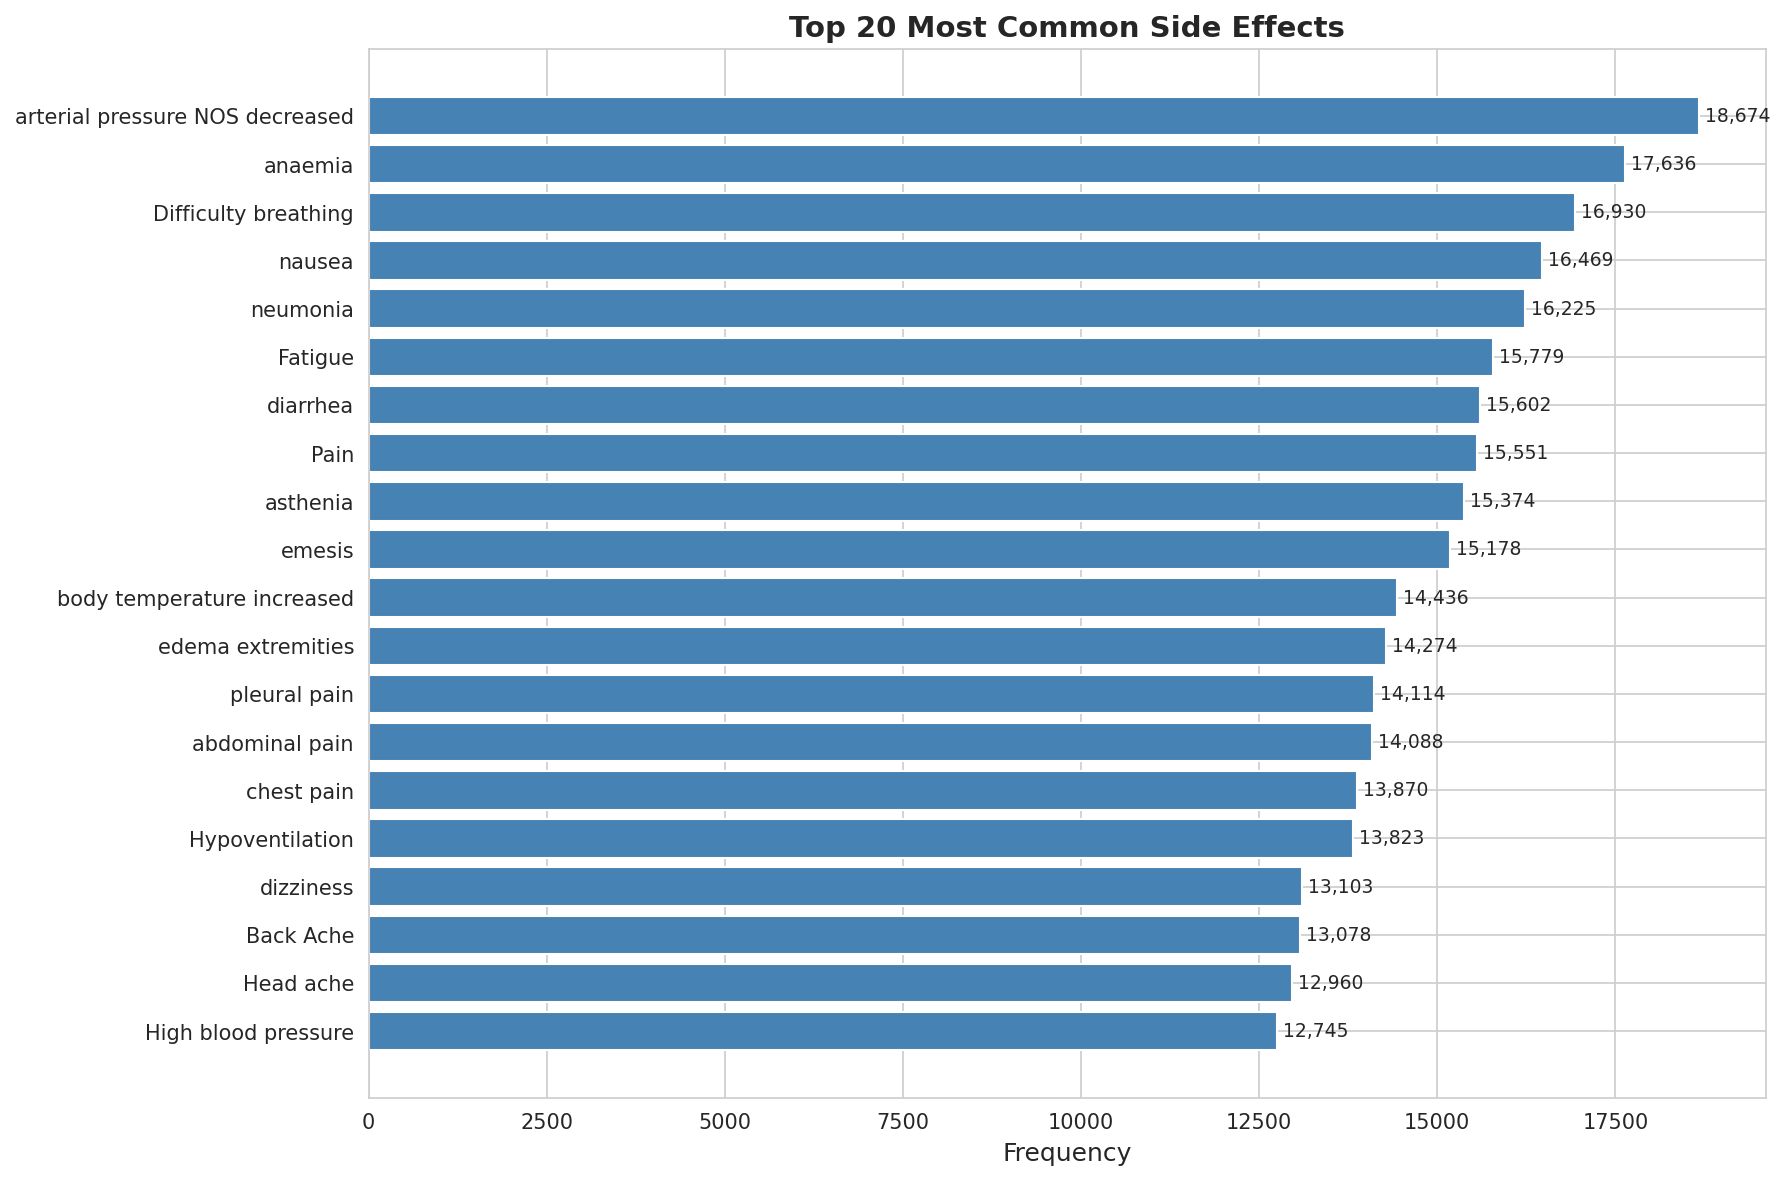

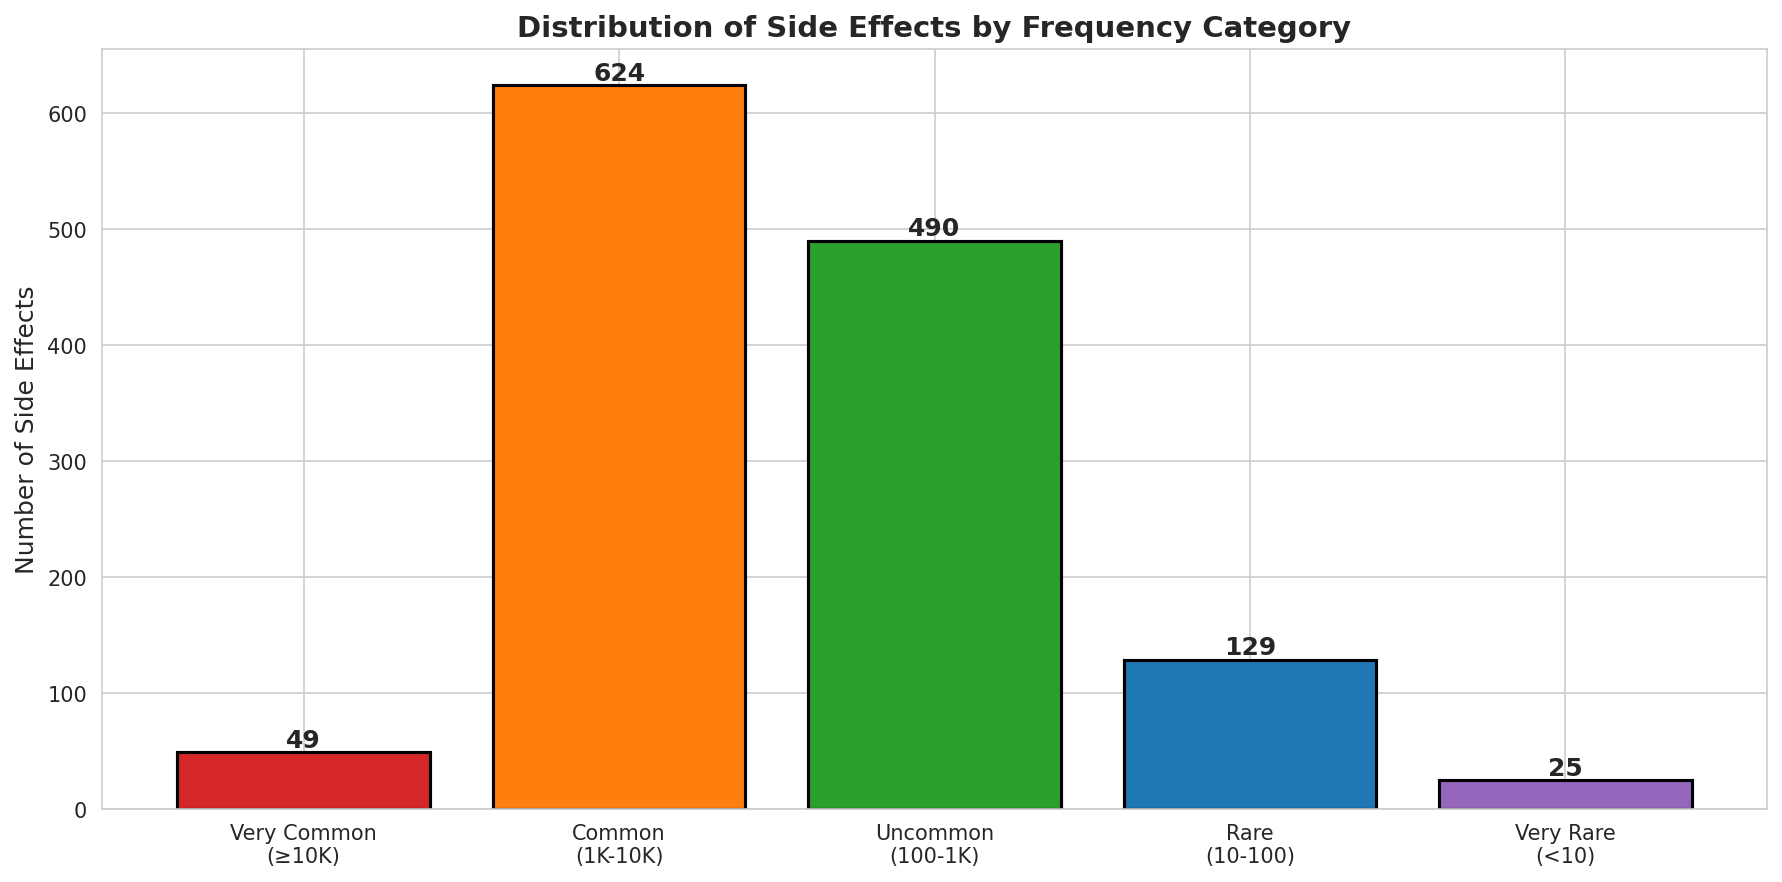

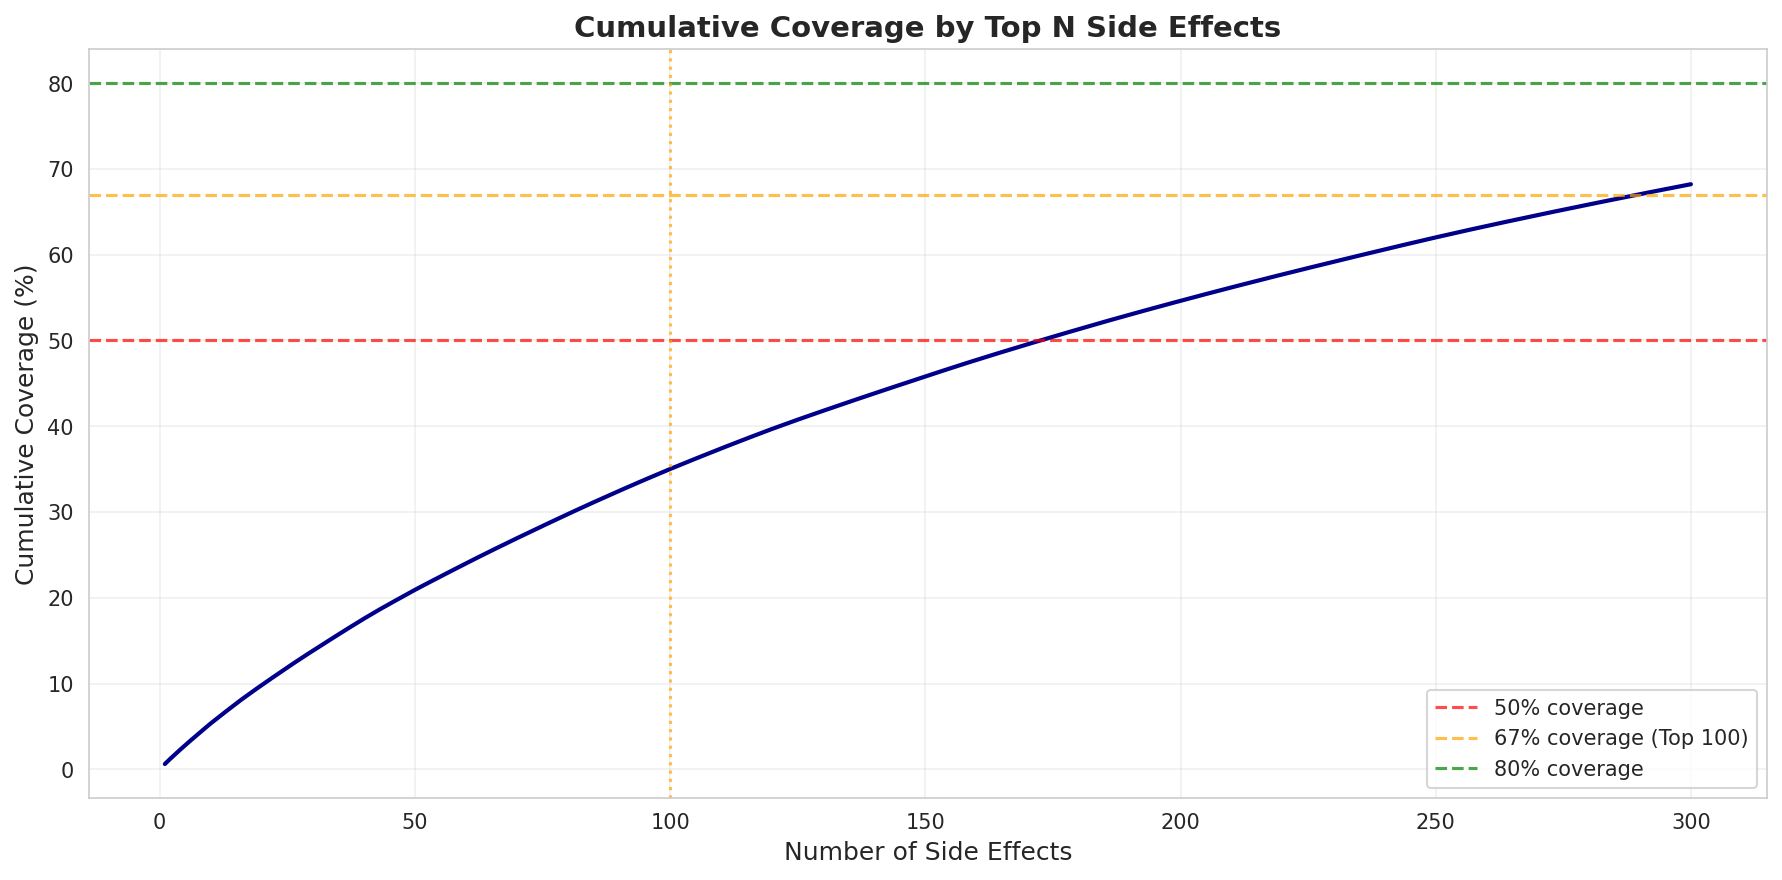

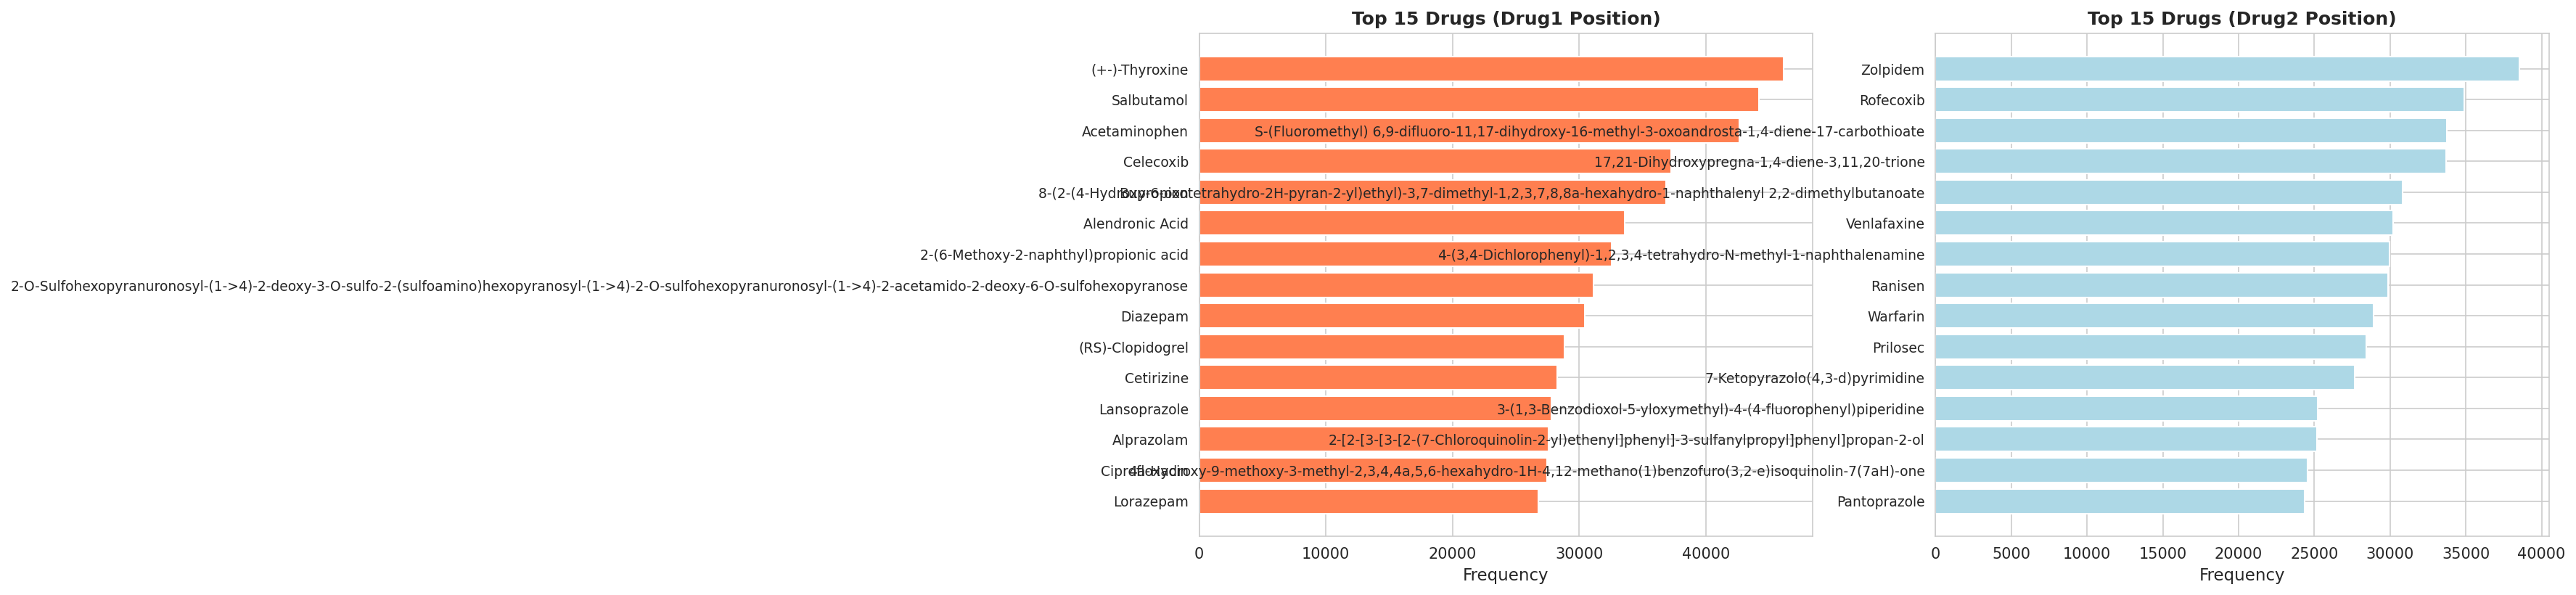

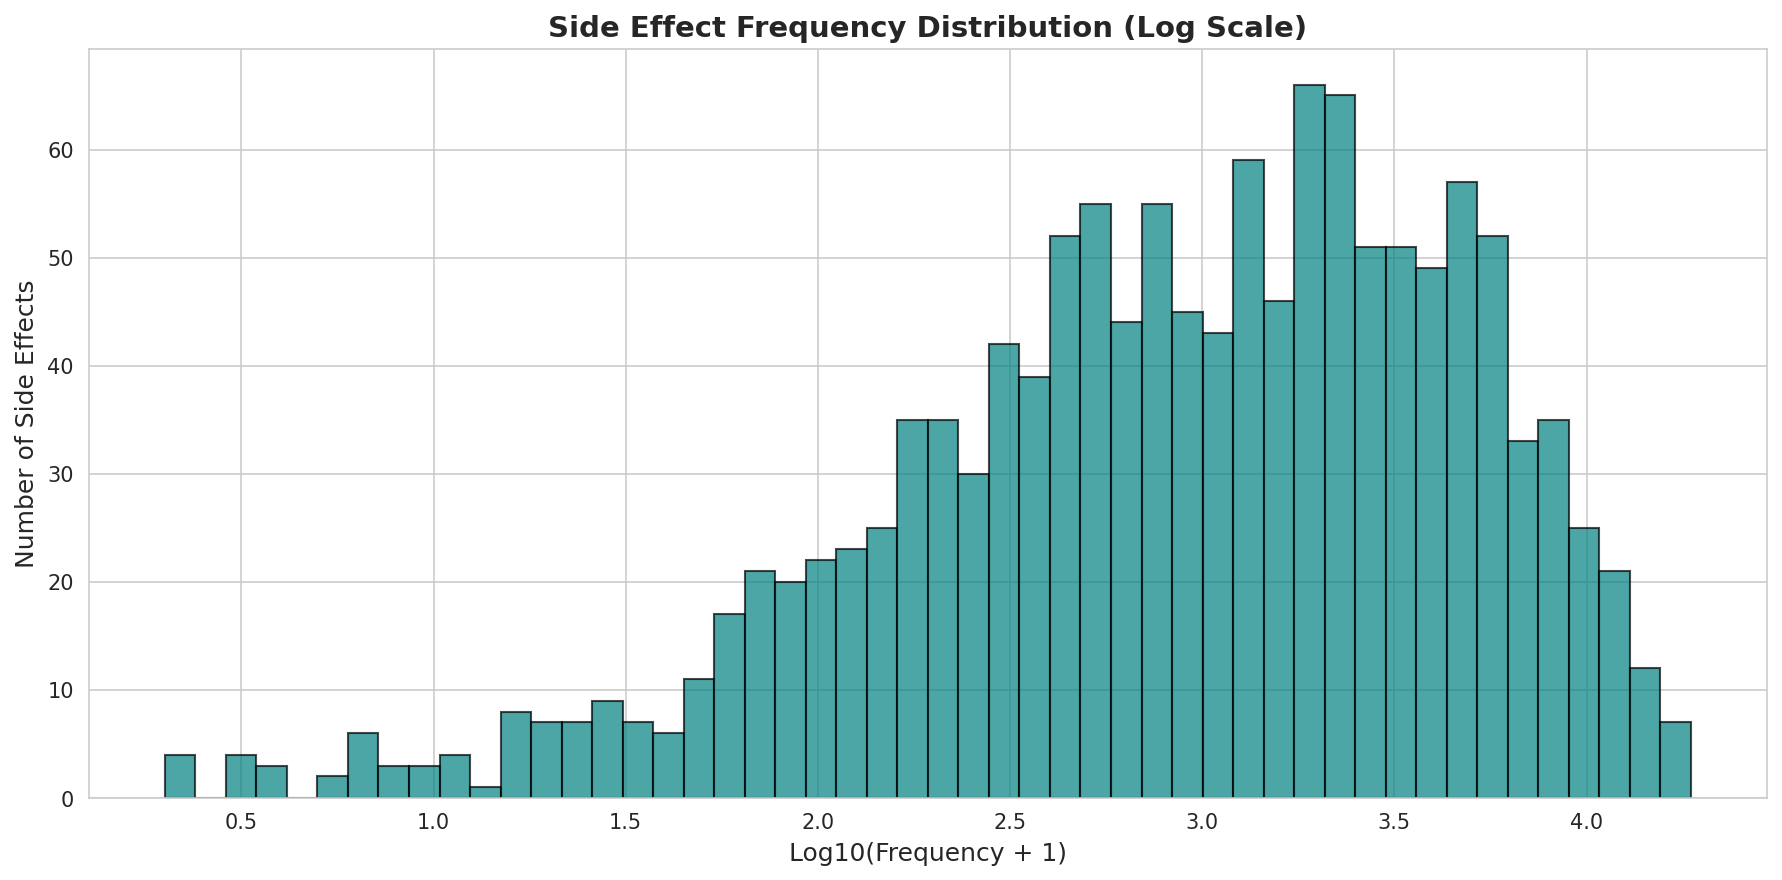

In [29]:
from IPython.display import Image, display

files = [
    'eda_top20_side_effects.png',
    'eda_frequency_distribution.png',
    'eda_coverage_curve.png',
    'eda_top_drugs.png',
    'eda_frequency_histogram.png'
]

for f in files:
    display(Image(f))


In [30]:
multi_label_df = pd.read_csv('twosides_multilabel_format.csv')
multi_label_df.head(10)


,Drug1_ID,Drug1_Name,Drug2_ID,Drug2_Name,SideEffects_List,Num_SideEffects
0,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000000206,Hexose,"['thrombocytopenia', 'icterus', 'sepsis', 'Bil...",8
1,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000000271,Calcium Cation,"['arteriosclerotic heart disease', 'anaphylact...",11
2,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000000444,Bupropion,"['proctalgia', 'neumonia', 'Extrasystoles Vent...",32
3,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000000772,2-O-Sulfohexopyranuronosyl-(1->4)-2-deoxy-3-O-...,"['loss of weight', 'icterus', 'aphasia', 'enla...",19
4,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000000853,(+-)-Thyroxine,"['agitated', 'erythema', 'blurred vision', 'Co...",27
5,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000000937,Nicotinate,"['enlarged liver', 'hepatitis', 'Tendinitis', ...",16
6,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000000942,3-(1-Methylpyrrolidin-2-yl)pyridine,"['proctalgia', 'Extrasystoles Ventricular', 'H...",23
7,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000001983,Acetaminophen,"['angina', 'femur fracture']",2
8,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000002162,Amlodipine,"['loss of weight', 'blurred vision', 'Cough', ...",24
9,CID000000085,"1-propanaminium, 3-carboxy-2-hydroxy-n,n,n-tri...",CID000002244,Aspirin,"['abnormal EEG', 'aspiration pneumonia', 'neum...",27


In [31]:
import pandas as pd

df = pd.read_csv('twosides_ddi_clean.csv')
print("Loaded", len(df), "records")


Loaded 3053271 records


In [32]:
#Step 2: Select top 100 side effects
side_effect_counts = df['SideEffect'].value_counts()
top_100_side_effects = side_effect_counts.head(100).index.tolist()

top_100_df = pd.DataFrame({
    'Rank': range(1, 101),
    'SideEffect': top_100_side_effects,
    'Frequency': [side_effect_counts[se] for se in top_100_side_effects],
    'Percentage': [(side_effect_counts[se] / len(df) * 100) for se in top_100_side_effects]
})
top_100_df.to_csv('top_100_side_effects.csv', index=False)


In [33]:
#Step 3: Filter data to top 100 side effects
df_filtered = df[df['SideEffect'].isin(top_100_side_effects)].copy()
print("Filtered to", len(df_filtered), "records")


Filtered to 1068777 records


In [34]:
#Step 4: Create multi-label format
multi_label = df_filtered.groupby(['Drug1_ID', 'Drug1_Name', 'Drug2_ID', 'Drug2_Name'])['SideEffect'] \
    .agg(lambda x: list(set(x))).reset_index()
multi_label.columns = ['Drug1_ID', 'Drug1_Name', 'Drug2_ID', 'Drug2_Name', 'SideEffects']


In [35]:
#Step 5: Create binary matrix
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=top_100_side_effects)
y_binary = mlb.fit_transform(multi_label['SideEffects'])


In [36]:
#Step 6: Create text features
multi_label['Drug_Pair_Text'] = multi_label['Drug1_Name'] + ' [SEP] ' + multi_label['Drug2_Name']
multi_label['Drug_Pair_Sorted'] = multi_label.apply(
    lambda x: ' [SEP] '.join(sorted([x['Drug1_Name'], x['Drug2_Name']])), axis=1
)


In [37]:
#Step 7: Split data
from sklearn.model_selection import train_test_split

X = multi_label[['Drug1_ID', 'Drug1_Name', 'Drug2_ID', 'Drug2_Name', 'Drug_Pair_Text', 'Drug_Pair_Sorted']]
y = y_binary

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, shuffle=True)


In [38]:
#Step 8: Save datasets and label mapping
import numpy as np
import json

# Save CSVs
pd.concat([X_train, pd.DataFrame(y_train, index=X_train.index, columns=mlb.classes_)], axis=1).to_csv('train_multilabel_top100.csv', index=False)
pd.concat([X_val, pd.DataFrame(y_val, index=X_val.index, columns=mlb.classes_)], axis=1).to_csv('val_multilabel_top100.csv', index=False)
pd.concat([X_test, pd.DataFrame(y_test, index=X_test.index, columns=mlb.classes_)], axis=1).to_csv('test_multilabel_top100.csv', index=False)

# Save label info
label_info = {
    'top_100_side_effects': top_100_side_effects,
    'num_labels': len(top_100_side_effects),
    'total_samples': len(multi_label),
    'train_samples': len(X_train),
    'val_samples': len(X_val),
    'test_samples': len(X_test)
}
with open('label_mapping_top100.json', 'w') as f:
    json.dump(label_info, f, indent=2)

# Save numpy arrays
np.save('X_train_indices.npy', X_train.index.values)
np.save('X_val_indices.npy', X_val.index.values)
np.save('X_test_indices.npy', X_test.index.values)
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)
np.save('y_test.npy', y_test)


In [39]:
# Save all variables
import dill

with open('workspace.pkl', 'wb') as f:
    dill.dump_session(f)


In [40]:
from google.colab import drive
drive.mount('/content/drive')

# Save workspace in Drive
with open('/content/drive/MyDrive/workspace.pkl', 'wb') as f:
    dill.dump_session(f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
!pip freeze > requirements.txt
